# Pokemon Analysis


## 1. Introduction
The following analysis uses a dataset created by Mario Tormo Romero and can be found [here](https://www.kaggle.com/mariotormo/complete-pokemon-dataset-updated-090420). The dataset provides a list of the 890 known Pokemon until 8th Generation, their varieties and various features. 

We will perform an exploratory analysis and gather some insights based on our Pokemon knowledge. We will look at the number and types of Pokemon, their heights and weights, and their battle stats. We start by removing the columns we're not interested in.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

pd.options.mode.chained_assignment = None  # default='warn'
pokedata = pd.read_csv("data\pokedex_0520.csv")

In [2]:
df = pokedata
#del_cols = ['Unnamed: 0','german_name','japanese_name','abilities_number','ability_1','ability_2','ability_hidden','species']
#df = df.drop(columns = del_cols)
df = df[['pokedex_number','name','generation','type_1','height_m','weight_kg','total_points','hp','attack','defense','sp_attack','sp_defense','speed']]
df.head()

,pokedex_number,name,generation,type_1,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,1,Bulbasaur,1,Grass,0.7,6.9,318.0,45.0,49.0,49.0,65.0,65.0,45.0
1,2,Ivysaur,1,Grass,1.0,13.0,405.0,60.0,62.0,63.0,80.0,80.0,60.0
2,3,Venusaur,1,Grass,2.0,100.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0
3,3,Mega Venusaur,1,Grass,2.4,155.5,625.0,80.0,100.0,123.0,122.0,120.0,80.0
4,4,Charmander,1,Fire,0.6,8.5,309.0,39.0,52.0,43.0,60.0,50.0,65.0


## 2. Pokemon through the Generations

We first see the number of Pokemon that were added in each generation. Generation I pokemon were released in the 1990s and the latest generation (VIII) were released in 2019-2020.

Note that the cumulative count here is more than the 890 unique Pokemons as pokemon like Meowth and Alalon Meowth count as 2 varieties under the same Pokedex number. 

We also see a distribution of the types of Pokemon and note that Water-type pokemon are most common (13% of all pokemon) followed by Normal-type and Grass-type pokemon.

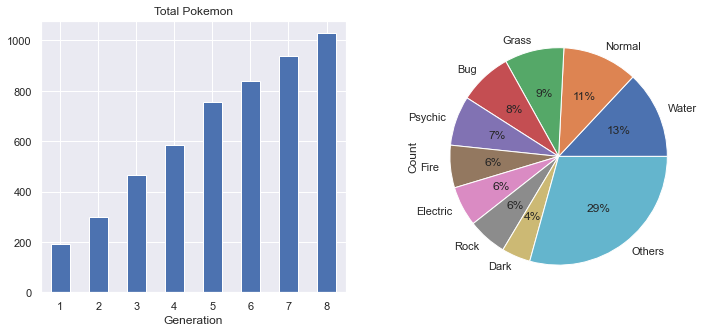

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12, 5))

g = df.value_counts(subset=['generation']).sort_index().cumsum()
g = g.reset_index()
g.columns = ['Generation', 'Count']
g.plot(ax=axes[0], x = 'Generation', title="Total Pokemon", kind='bar', legend = False, rot = 0, align='center', color = 'b');

h = df.value_counts(subset=['type_1']).sort_index()
h = h.reset_index()
h.columns = ['Type','Count']
h = h.sort_values(by='Count', ascending=False)
h1 = h[:9]
new_row = pd.DataFrame(data = {
    'Type' : ['Others'],
    'Count' : [h['Count'][9:].sum()]
})
h1 = pd.concat([h1, new_row])
h1.plot(ax=axes[1], kind = 'pie', y = 'Count', autopct='%1.0f%%', labels = h1['Type'], legend = False);

plt.show()

## 3. Pokemon BMI (Body Mass Index)

Next we will calculate the BMI for various Pokemon types.

### Review of Heights and Weights
Before we do that, let's compare the heights and weights with a simple scatter plot to see if we can find any correlation between the two for Pokemons. Generally speaking, for humans, the taller you are, the heavier you're expected to be.

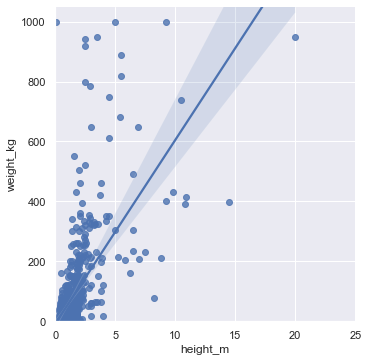

In [4]:
b = df[['name','type_1','weight_kg', 'height_m']]
sns.lmplot(x='height_m',y='weight_kg',data=b,fit_reg=True).set(xlim=(0, 25), ylim=(0, 1050));

### Review Outliers
We notice the positive corelation, which can be expected but we also observe some extremes values of weight - particularly one with height close to 0m but weight at 1000kg. Upon closer review of the entry, we find it's for Cosmoem which is a ProtoStar pokemon, which makes sense since a star is supposed to be extremely dense. Note the Type for this pokemon is Psychic.

In [5]:
b.sort_values(by='weight_kg', ascending=False).head()

,name,type_1,weight_kg,height_m
924,Celesteela,Steel,999.9,9.2
917,Cosmoem,Psychic,999.9,0.1
456,Primal Groudon,Ground,999.7,5.0
1026,Eternatus,Poison,950.0,20.0
455,Groudon,Ground,950.0,3.5


### BMI
As expected, the BMI for Psychic type is an outlier and we exclude it to get a better view of the BMIs of the other pokemon types. We observe Steel and Rock types of Pokemon have higher BMIs and Fairy type Pokemons have the lowest BMI.

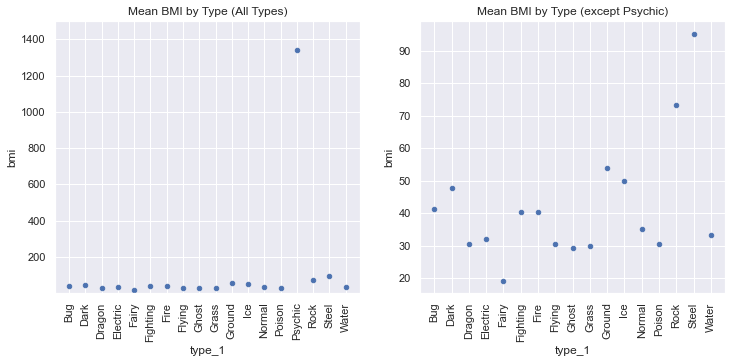

In [6]:
b['bmi'] = round(b.weight_kg/(b.height_m * b.height_m),2)
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,5))

axes[0].set_title('Mean BMI by Type (All Types)')
b1 = b.groupby('type_1').mean()
b1.reset_index().plot(ax = axes[0], subplots=True, x = 'type_1', y = 'bmi', kind = 'scatter', rot=90, ylim = (1, 1500), color='b')

axes[1].set_title('Mean BMI by Type (except Psychic)')
b2 = b.groupby('type_1').mean()
b2 = b2.reset_index()
b2 = b2[b2.type_1 != 'Psychic']
b2.plot(ax = axes[1], subplots=True, x = 'type_1', y = 'bmi', kind = 'scatter', rot=90, color='b')

plt.show()

## 4. Pokemon Battle Stats

Now let's look at the battle stats like HP, Attack, Defense, Special Attack, Special Defense and Speed. 


### Range and Corelation
We first look at a whisker plot for a quick analysis of the range of each of the stats. We also look at the correlation of each field with the others. We note that while all battle stats have a positive correlation, it is weak to moderate at best. The highest correlation (0.54) is observed between Defense and Special Defense while Speed and Defense are not correlated at all.

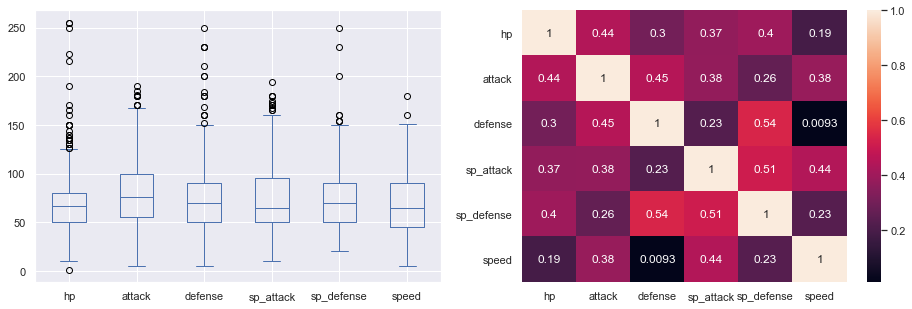

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 5))

df[['hp','attack','defense','sp_attack','sp_defense','speed']].plot.box(ax = axes[0], color = 'b');

corrMatrix = df[['hp','attack','defense','sp_attack','sp_defense','speed']].corr()
sns.heatmap(corrMatrix, annot=True, ax = axes[1])

plt.show()


### Max Battle Stats
Next we look at which Pokemon is strongest for each battle stat. When we pick the record with the Max value, we observe that Blissey has the highest HP and that's why it's the most popular choice for defending gyms.

In [8]:
m = df[['name','hp','attack','defense','sp_attack','sp_defense','speed']]
m = m.set_index('name')
m = m.idxmax().reset_index()
m.columns = ['Battle Stat','Highted Rated Pokemon']
m['Battle Stat'] = m['Battle Stat'].str.title()
m

,Battle Stat,Highted Rated Pokemon
0,Hp,Blissey
1,Attack,Mega Mewtwo X
2,Defense,Eternatus Eternamax
3,Sp_Attack,Mega Mewtwo Y
4,Sp_Defense,Eternatus Eternamax
5,Speed,Deoxys Speed Forme


## 5. Conclusion
We did an exploratory analysis of the Pokemon data and figured out the number of pokemons through the generations and determined that Water-type pokemon are the most popular. We found that while Pokemon BMI is generally consistent with human BMI, there are outliers like Cosmoen which are observed due to the nature of certain pokemon like those based on proton stars. We also looked at the battle stats and found that Blissey rightfully deserves its tag as the best gym defender due to it's high HP.

In [10]:
#!jupyter nbconvert pokemon_eda_final2.ipynb --no-input --to html

[NbConvertApp] Converting notebook pokemon_eda_final2.ipynb to html
[NbConvertApp] Writing 741273 bytes to pokemon_eda_final2.html
